### 1.Load Data into DataFrame

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#upload file
from google.colab import files
upload = files.upload()

In [ ]:
#load data into df named adult_df
adult_df= pd.read_csv('adult.csv')

In [ ]:
#display first 5 rows
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
#checking columns
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

### 2. Clean Data by removing empty values

In [ ]:
#replace  ? with na
adult_df = adult_df.replace(to_replace='?' , value = np.nan)
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


###3.ONE HOT ENCODER

Data types consist of objects , so must convert to numerical variables

In [ ]:
#checking data types
adult_df.info()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [ ]:
#Create an instance of OHE
ohe_enc = OneHotEncoder()

In [ ]:
#perform one-hot encoding on the categorical features
ohe_enc.fit_transform(adult_df[['marital.status', 'education', 'workclass', 'occupation', 'relationship', 'race', 'sex','native.country' ]]).toarray()

In [ ]:
#create new columns
ohe_enc_df = pd.DataFrame(ohe_enc.fit_transform(adult_df[['marital.status', 'education', 'workclass', 'occupation', 'relationship', 'race', 'sex','native.country']]).toarray(), columns =ohe_enc.get_feature_names_out())

In [ ]:
# merge the two dataframes together
adult_df[ohe_enc.get_feature_names_out()] = ohe_enc.fit_transform(adult_df[['marital.status', 'education', 'workclass', 'occupation', 'relationship', 'race', 'sex','native.country']]).toarray()

In [ ]:
#viewing columns
adult_df.columns

In [ ]:
# remove old column and assign a new variable
adult_df = adult_df.drop(['marital.status', 'education', 'workclass', 'occupation', 'relationship', 'race', 'sex','native.country'], axis=1)

In [ ]:
#viewing new columns
adult_df.columns

###4.Create X & y variable and splitting data


In [ ]:
# Partition the dataset into X
X = adult_df.drop(['income','fnlwgt','capital.gain','capital.loss'], axis=1)
#Partition the dataset into y target variable.
y = adult_df['income']

In [ ]:
#viewing info on X variable
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 105 entries, age to native.country_nan
dtypes: float64(102), int64(3)
memory usage: 26.1 MB


In [ ]:
#check for target variable balance
adult_df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###4.Scaling the data

In [ ]:
# normalize feature matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# fit our scaler
scaler.fit(X_train)

StandardScaler()

In [ ]:
# scale our data X
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###**Model** **1**: Neural Networks for classification

In [ ]:
# Train NN
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [ ]:
# Grid search for NN paramters
param_grid = {
    'hidden_layer_sizes': [(10, 30, 10), (20, 50, 20)],
    'activation': ['tanh', 'relu']
}

In [ ]:
#create clf to perform gridsearch
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, param_grid=param_grid)

In [ ]:
#fitting the model
clf.fit(X_train_scaled, y_train)

In [ ]:
# review grid results
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score')[['param_activation','param_hidden_layer_sizes', 'mean_test_score', 'rank_test_score']]

,param_activation,param_hidden_layer_sizes,mean_test_score,rank_test_score
2,relu,"(10, 30, 10)",0.826496,1
0,tanh,"(10, 30, 10)",0.824937,2
3,relu,"(20, 50, 20)",0.813477,3
1,tanh,"(20, 50, 20)",0.812285,4


In [ ]:
#viewing best model parameters
clf.best_estimator_

MLPClassifier(hidden_layer_sizes=(10, 30, 10))

In [ ]:
# create our prediction
y_pred = clf.predict(X_test_scaled)

In [ ]:
# evaluate classifier performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      8150
        >50K       0.65      0.61      0.63      2596

    accuracy                           0.83     10746
   macro avg       0.76      0.75      0.76     10746
weighted avg       0.82      0.83      0.83     10746



Text(0.5, 1.0, 'ROC Curve')

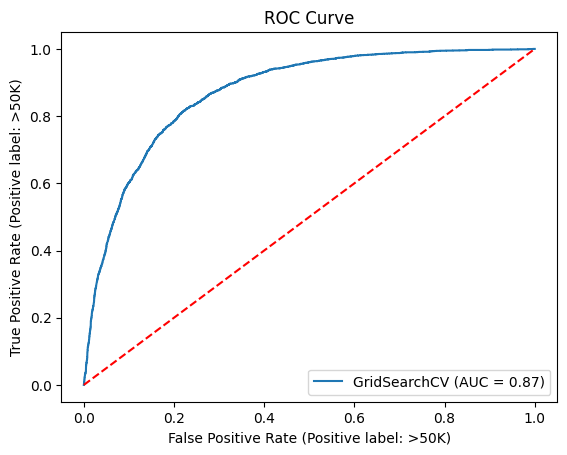

In [ ]:
# display roc curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

nn_disp = RocCurveDisplay.from_estimator(clf, X_test_scaled, y_test)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title('ROC Curve')

### **Model** **2**:Logistic Regression

In [ ]:
 from sklearn.linear_model import LogisticRegression

In [ ]:
#creating model
lr_model = LogisticRegression()

In [ ]:
#fitting the model
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
#making prediction before optimization
y_pred = lr_model.predict(X_test_scaled)

In [ ]:
#build gridsearch to optimize model
from sklearn.model_selection import GridSearchCV

In [ ]:
#hyperparameter
param_values = {
                'C': [0.001, 0.01, 0.1, 1, 5, 10 ]}

In [ ]:
#Calling logistic regression for optimization
clf = LogisticRegression(penalty='l1', solver='liblinear')

grid_clf = GridSearchCV (clf, param_values, scoring = 'recall')

In [ ]:
#fitting the regression model
grid_clf.fit(X_train_scaled, y_train)

In [ ]:
#predict values based on the grid search
y_pred_best = grid_clf.predict(X_test_scaled)

In [ ]:
#determining best estimators
grid_clf.best_estimator_

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [ ]:
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      8150
        >50K       0.70      0.42      0.53      2596

    accuracy                           0.82     10746
   macro avg       0.77      0.68      0.71     10746
weighted avg       0.80      0.82      0.80     10746



Text(0.5, 1.0, 'ROC Curve')

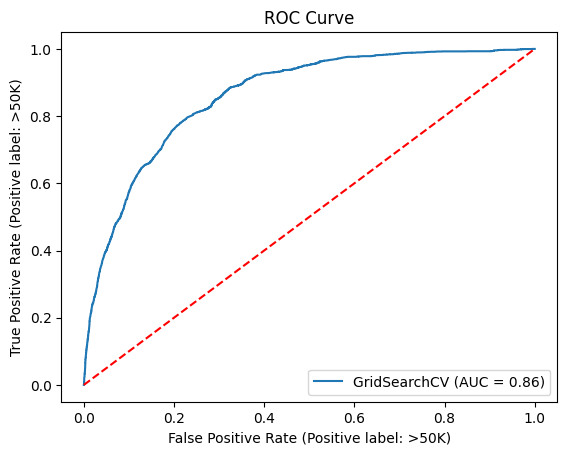

In [ ]:
# Visualize roc curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

nn_disp = RocCurveDisplay.from_estimator(grid_clf, X_test_scaled, y_test)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title('ROC Curve')

###Model 3: K-Nearest Neighbor

In [ ]:
#train a classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [ ]:
#define a grid of hyperparameter values
paramGrid = {'n_neighbors' : range(1, 15+1)}

In [ ]:
 #import gridsearch function
 from sklearn.model_selection import GridSearchCV

In [ ]:
#perform hyperparameter tuning
grid_knn = GridSearchCV(knn_model, paramGrid, cv =10, scoring='accuracy')

In [ ]:
#fitting the data to the model
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 16)}, scoring='accuracy')

In [ ]:
#viewing best parameters
pd.DataFrame (grid_knn.cv_results_).sort_values('rank_test_score') [['param_n_neighbors', 'mean_test_score', 'rank_test_score']].head()

,param_n_neighbors,mean_test_score,rank_test_score
14,15,0.823699,1
13,14,0.823241,2
12,13,0.822049,3
11,12,0.821820,4
7,8,0.820720,5


In [ ]:
#viewing best parameters
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [ ]:
#Create a prediction
y_pred = grid_knn.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
#generate classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      8150
        >50K       0.66      0.55      0.60      2596

    accuracy                           0.82     10746
   macro avg       0.76      0.73      0.74     10746
weighted avg       0.81      0.82      0.82     10746



In [ ]:
#plot roc curve
from sklearn.metrics import RocCurveDisplay

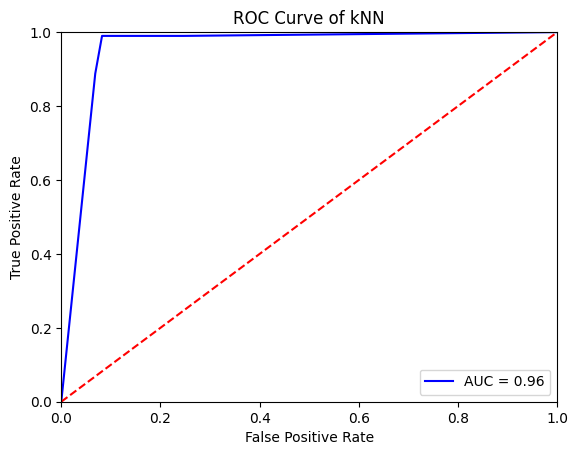

In [ ]:
#Visualize using ROC curve
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve

from sklearn.metrics import auc

import matplotlib.pyplot as plt



X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)



y_scores = knn.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])

roc_auc = auc(fpr, tpr)



plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.title('ROC Curve of kNN')

plt.show()